Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the datasets

In [23]:
df1= pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\movies.csv")

In [24]:
df2= pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\ratings.csv")

In [26]:
df3= pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\tags.csv")

In [138]:
df_links= pd.read_csv(r"C:\Users\udayk\Downloads\movie_data\links.csv")

#### What is the shape of "movies.csv"?

In [25]:
df1.shape

(9742, 3)

#### What is the shape of "ratings.csv"?

In [14]:
df2.shape

(100836, 4)

#### How many unique "userId" are available in "ratings.csv"

In [22]:
df2["userId"].nunique()

610

#### Which movie has recieved maximum number of user ratings?

In [9]:
df_new= pd.merge(df1,df2,how="inner",on= "movieId")

In [21]:
df_new["title"].value_counts().nlargest(1)

title
Forrest Gump (1994)    329
Name: count, dtype: int64

#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [28]:
df_tags= pd.merge(df1,df3,how="inner",on= "movieId")

In [36]:
df_tags[df_tags['title']=="Matrix, The (1999)"]["tag"]

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [39]:
df_new[df_new["title"]=="Terminator 2: Judgment Day (1991)"]["rating"].mean()

3.970982142857143

#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

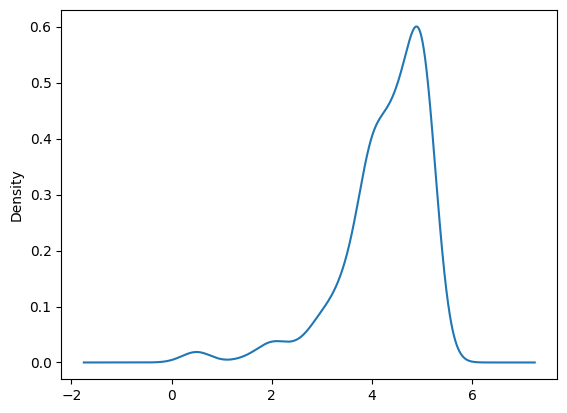

In [41]:
df_new[df_new["title"]=="Fight Club (1999)"]["rating"].plot(kind="kde")

### Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [94]:
df4= pd.DataFrame(df_new.groupby("movieId")["rating"].count())

2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [96]:
df5= pd.merge(df1,df4,how="inner",on= "movieId")

In [97]:
df5

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


3. Filter only those movies which have more than 50 user ratings (i.e. > 50).


In [105]:
dd =df5[df5["rating"]>50].sort_values("rating",ascending=False)

#### Which movie is the most popular based on  average user ratings?

In [136]:
df6= pd.merge(dd,df2,how="inner",on= "movieId")

In [137]:
df6

,movieId,title,genres,rating_x,userId,rating_y,timestamp
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,1,4.0,964980962
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,6,5.0,845553200
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,7,5.0,1106635915
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,8,3.0,839463527
4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,10,3.5,1455301685
...,...,...,...,...,...,...,...
40655,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,590,3.0,1258419842
40656,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,599,3.0,1498525684
40657,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,603,3.0,953925740
40658,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,606,3.5,1191361322


In [135]:
df6.groupby("title")["rating_y"].mean().sort_values(ascending=False).nlargest(1)

title
Shawshank Redemption, The (1994)    4.429022
Name: rating_y, dtype: float64

#### Select all the correct options which comes under top 5 popular movies based on number of user ratings

In [108]:
dd.head()

,movieId,title,genres,rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [161]:
df6[df6["genres"].str.contains("Sci-Fi")].groupby("title")["rating_x"].count().sort_values(ascending=False).nlargest(3)

title
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Name: rating_x, dtype: int64

In [144]:
d= pd.merge(df6,df_links,how="inner",on= "movieId")

In [172]:
d

,movieId,title,genres,rating_x,userId,rating_y,timestamp,imdbId,tmdbId
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,1,4.0,964980962,109830,13.0
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,6,5.0,845553200,109830,13.0
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,7,5.0,1106635915,109830,13.0
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,8,3.0,839463527,109830,13.0
4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,10,3.5,1455301685,109830,13.0
...,...,...,...,...,...,...,...,...,...
40655,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,590,3.0,1258419842,118971,1813.0
40656,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,599,3.0,1498525684,118971,1813.0
40657,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,603,3.0,953925740,118971,1813.0
40658,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,606,3.5,1191361322,118971,1813.0


#### Mention the movieId of the movie which has the highest IMDB rating.

In [183]:
d.groupby(["title","movieId"])["rating_y"].mean().sort_values(ascending=False).nlargest(1)

title                             movieId
Shawshank Redemption, The (1994)  318        4.429022
Name: rating_y, dtype: float64

#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [195]:
d[d["genres"].str.contains("Sci-Fi")].groupby(["title","movieId"])["rating_y"].mean().sort_values(ascending=False).nlargest(1)

title                                      movieId
Star Wars: Episode IV - A New Hope (1977)  260        4.231076
Name: rating_y, dtype: float64